In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Walmart%20Daily%20Stock%20Prices%201972-2022/walmart_stock.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Volume     1258 non-null   int64  
 6   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [5]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000
mean,72.357854,72.839388,71.918601,72.388450,8.222093e+06,67.238838
std,6.768090,6.768187,6.744076,6.756859,4.519781e+06,6.722609
min,56.389999,57.060001,56.299999,56.419998,2.094900e+06,50.363689
25%,68.627503,69.059998,68.162503,68.632497,5.791100e+06,63.778335
50%,73.235000,73.725002,72.839996,73.265000,7.093500e+06,68.541162
75%,76.629997,77.094999,76.250000,76.709999,9.394675e+06,71.105668
max,90.800003,90.970001,89.250000,90.470001,8.089810e+07,84.914216


In [6]:
df['Date']=pd.to_datetime(df['Date'])
df.sample(5)

,Date,Open,High,Low,Close,Volume,Adj Close
1244,2016-12-12,70.070000,71.779999,70.019997,71.669998,9084100,71.146861
535,2014-02-20,73.050003,74.000000,72.809998,73.519997,13079100,67.318849
704,2014-10-21,75.180000,76.199997,75.010002,76.019997,8299700,70.955192
1213,2016-10-27,69.599998,70.000000,69.389999,69.830002,7131600,68.827683
365,2013-06-18,75.000000,75.879997,74.800003,75.730003,6739700,68.525025


In [7]:
enddate=df[df['Date'] <= '2013-01-01']
enddate

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215
...,...,...,...,...,...,...,...
245,2012-12-24,68.510002,68.809998,68.309998,68.570000,2904800,61.280931
246,2012-12-26,68.559998,68.650002,67.730003,67.989998,6092900,60.762584
247,2012-12-27,68.029999,68.419998,67.790001,68.190002,7384200,60.941328
248,2012-12-28,67.910004,68.349998,67.540001,67.610001,5513400,60.422981


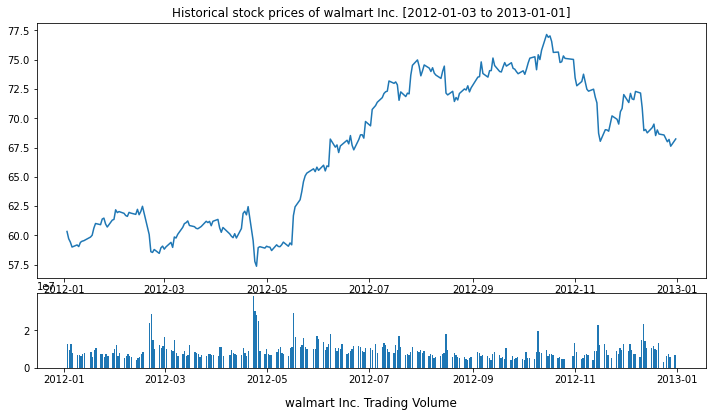

In [8]:
newdata=enddate.set_index('Date')
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(newdata.index, newdata["Close"])
plt.title('Historical stock prices of walmart Inc. [2012-01-03 to 2013-01-01]')
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
bottom_plt.bar(newdata.index, newdata['Volume'])
plt.title('\nwalmart Inc. Trading Volume', y=-0.60)
plt.gcf().set_size_inches(12,8)